In [144]:
# Starting code for UVA CS 4501 Machine Learning- KNN

__author__ = 'yl7sr'
import numpy as np
np.random.seed(37)
# for plot
import matplotlib.pyplot as plt
#more imports
from sklearn.neighbors import KNeighborsClassifier
## the only purpose of the above import is in case that you want to compare your knn with sklearn knn

1 0.575
3 0.599


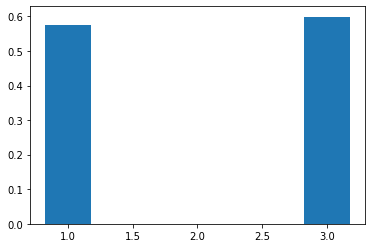

3

In [143]:
x,y = read_file('../data/Movie_Review_Data.txt')
# print(x.shape,y.shape)
# x_train, y_train, x_test, y_test = fold(x,y,2,4)
# print(np.sum(y_test),y_train.shape)
# print(x_test.shape,x_train.shape)
# y_predict = classify(x_train, y_train, x_test, 3)
# calc_accuracy(y_predict, y_test)
# print(y_train)
findBestK(x, y, [3,5,7,9,11,13], nfolds=4)

In [148]:
# Load file into np arrays
# x is the features
# y is the labels
def read_file(file):
    data = np.loadtxt(file, skiprows=1)
    np.random.shuffle(data)
    x = data[:, :-1]
    y = data[:, -1].astype(int)
    return x, y


# 2. Generate the i-th fold of k fold validation
# Input:
# x is an np array for training data
# y is an np array for labels
# i is an int indicating current fold
# nfolds is the total number of cross validation folds
def fold(x, y, i, nfolds):
    # your code
    width = int(x.shape[0]/nfolds)
    x_left, x_test, x_right =  np.split(x,[i*width,(i+1)*width],axis=0)
    y_left, y_test, y_right =  np.split(y,[i*width,(i+1)*width],axis=0)
    x_train = np.concatenate((x_left,x_right), axis = 0)
    y_train = np.concatenate((y_left,y_right), axis = 0)
    return x_train, y_train, x_test, y_test


# 3. Classify each testing points based on the training points
# Input
# x_train: a numpy array of training data 
# x_test: a numpy array
# k: the number of neighbors to take into account when predicting the label
# Output
# y_predict: a numpy array 
def classify(x_train, y_train, x_test, k):
    # your code
    # Euclidean distance as the measurement of distance in KNN
    # Build the distance matrix
    y_predict = np.zeros((len(x_test)),dtype = int)
    for i in range(len(x_test)):
        dis_line = np.zeros((len(x_train)),dtype=float)
        for j in range(len(x_train)):
            dis_line[j] = distance(x_test[i],x_train[j])
        dis_line = np.concatenate((dis_line.reshape(-1,1),y_train.reshape(-1,1)),axis=1)
        copy = dis_line.copy()
        #sort the 2d array by the first cloumn
        copy = copy[copy[:,0].argsort()]
        vote = 0
        for j in range(k):
            if copy[j][1] == 1:
                vote += 1
            else:
                vote -= 1
        y_predict[i] = int(vote > 0)
#     print(y_predict)
    return y_predict

def distance(p1, p2):
    return np.sqrt(np.sum(np.power(p1-p2,2)))

# 4. Calculate accuracy by comaring with true labels
# Input
# y_predict is a numpy array of 1s and 0s for the class prediction
# y is a numpy array of 1s and 0s for the true class label
def calc_accuracy(y_predict, y):
    # your code
    total = y_predict.shape[0]
    correct = 0
    for i in range(total):
        if y_predict[i] == y[i]: correct += 1
    acc = float(correct/total)
    return acc

# 1. Find the best K
def findBestK(x, y, klist, nfolds):
    kbest = 0
    best_acc = 0
    accuracy_list = []
    for k in klist:
        # your code here
        # to get nfolds cross validation accuracy for k neighbors
        # implement fold(x, y, i, nfolds),classify(x_train, y_train, x_test, k) and calc_accuracy(y_predict, y)
        accuracy = 0.0
        for i in range(nfolds):
            x_train, y_train, x_test, y_test = fold(x,y,i,nfolds)
            y_predict = classify(x_train, y_train, x_test, k)
            accuracy += calc_accuracy(y_predict, y_test)
        accuracy /= nfolds # CROSS VALIDATION accuracy for k neighbors
        if accuracy > best_acc:
            kbest = k
            best_acc = accuracy
        accuracy_list.append(accuracy)
        print(k, accuracy)
    # plot cross validation error for each k : implement function barplot(klist, accuracy_list)
    barplot(klist, accuracy_list)
    return kbest

# 5. Draw the bar plot of k vs. accuracy
# klist: a list of values of ks
# accuracy_list: a list of accuracies
def barplot(klist, accuracy_list):
    # your code
    # use matplot lib to generate bar plot with K on x axis and cross validation accuracy on y-axis
#     fig, ax = plt.subplots()
    plt.bar(klist, accuracy_list,width = 0.35)
#     plt.xticks(klist, ('Bill', 'Fred', 'Mary', 'Sue'))
    plt.show()
    return

3 0.6004999999999999
5 0.6094999999999999
7 0.624
9 0.6075
11 0.6115
13 0.616


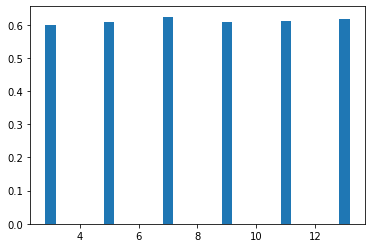

Best K is:  7


In [149]:

if __name__ == "__main__":
    filename = "Movie_Review_Data.txt"
    # read data
    x, y = read_file('../data/'+filename)
    nfolds = 4
    klist = [3, 5, 7, 9, 11, 13]
    # Implementation covers two tasks, both part of findBestK function
    # Task 1 : implement kNN classifier for a given x,y,k 
    # Task 2 : implement 4 fold cross validation to select best k from klist
     
    bestk = findBestK(x, y, klist, nfolds)
    # report best k, and accuracy, discuss why some k work better than others
    print("Best K is: ", bestk)
